# Preperation

In [ ]:
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from datetime import datetime
import pytz
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import calendar
from matplotlib.patches import Ellipse


#TEST TEST

In [2]:
#Longitude of the observetory in dms
d_1=12
m_1=00
s_1=57

#Latitude of the observetory in dms
d_2=48
m_2=40
s_2=54


In [3]:
def dms_to_deg(d,m,s):
    if d == 0:
        degrees =(np.abs(d) + m/60 + s/3600)
    else:
        degrees = (np.abs(d) + m/60 + s/3600)* np.sign(d)
    return degrees

Lon = dms_to_deg(d_1,m_1,s_1)
Lat = dms_to_deg(d_2,m_2,s_2)

def deg_to_dms(degrees):
    deg=np.abs(degrees)
    d=np.round(np.floor(deg)*degrees/deg,0)
    m=np.round(np.floor(((deg-np.abs(d))*60)),0)
    s=np.round(((deg-np.abs(d)-(m/60))*3600),2)
    return d,m,s


In [4]:
def hms_to_deg(h,m,s):
    if h==0:
        degrees = 15*(np.abs(h) + m/60 + s/3600)
    else:
        degrees = 15*(np.abs(h) + m/60 + s/3600)*np.sign(h)
    return degrees

def H_to_hms(H):
    h=np.floor(H)
    m=np.floor((H-h)*60)
    s=np.round((H-h-(m/60))*3600,2)
    return h,m,s

In [5]:
def deg_to_rad(degrees):
    rad = degrees * np.pi/180
    return rad

def rad_to_deg(rad):
    degrees = rad * 180/np.pi
    return degrees


In [6]:
def earth_rotation_angle(zeit_jd):
    D_U = zeit_jd-2451545.0
    theta_0 = 360 * (0.7790572732640 + 1.00273781191135448*D_U)
    theta = theta_0 % 360
    return theta

In [7]:
def rotation_matrix_z(angles):
    if isinstance(angles, (int, float)):
        angles = [angles]
    matrices = []
    for t_p in angles:
        R_z = np.array([[np.cos(t_p), np.sin(t_p), 0],[-np.sin(t_p), np.cos(t_p), 0],[0, 0, 1]])
        matrices.append(R_z)
    return matrices

In [8]:
pi=np.pi

def rotation_matrix_y(phi):
    R_y = np.array([[np.sin(phi),0,-np.cos(phi)],[0,1,0],[np.cos(phi),0,np.sin(phi)]])
    return R_y
    
R_y=rotation_matrix_y(deg_to_rad(Lat))
diag = np.array([[-1,0,0],[0,1,0],[0,0,1]])

In [9]:
def azimut_hoehe(zeit_jd,ra_deg,dec_deg):
    ra=deg_to_rad(ra_deg)
    dec=deg_to_rad(dec_deg) 
    ERA = deg_to_rad(earth_rotation_angle(zeit_jd)) + deg_to_rad(Lon)
    R_z = rotation_matrix_z(ERA)
    R = np.array([[np.cos(ra)*np.cos(dec)],[np.sin(ra)*np.cos(dec)],[np.sin(dec)]])
    M = diag@(R_y@(R_z@R))
    H = np.arcsin(M[:,2,:])
    A = np.arctan2(M[:,1,:],M[:,0,:])
    H_deg = rad_to_deg(H)
    A_deg = rad_to_deg(A)
    return A_deg, H_deg  

In [10]:
def zenith_distance(Alltitude):
    z=90-Alltitude
    return z

In [11]:
Objects=('α Pavonis', 'δ Cyg', 'η Carinae', 'LMC', 'Veil Nebula', 'M1','M27', 'M13', 'M16', 'M31', 'M33', 'M35',"M42", 'M45', 'M51', 'M57', 'M63',"M64", 'M78', 'M81', 'M82', 'M95', 'M96', 'M97', 'M101',"M106", 'M108', 'NGC281', 'NGC869', 'NGC884', 'NGC1','NGC1491', 'NGC2237', 'NGC2264', 'NGC3521', 'NGC4438', 'NGC4565', 'NGC4631', 'NGC5139','NGC6823','NGC6946', 'NGC7023', 'NGC7293','NGC7317', 'NGC7331', 'NGC7635', 'IC443', 'IC1396', 'IC1805', 'IC1848', 'IC5146', 'IC4703')
print(', '.join(Objects))

α Pavonis, δ Cyg, η Carinae, LMC, Veil Nebula, M1, M27, M13, M16, M31, M33, M35, M42, M45, M51, M57, M63, M64, M78, M81, M82, M95, M96, M97, M101, M106, M108, NGC281, NGC869, NGC884, NGC1, NGC1491, NGC2237, NGC2264, NGC3521, NGC4438, NGC4565, NGC4631, NGC5139, NGC6823, NGC6946, NGC7023, NGC7293, NGC7317, NGC7331, NGC7635, IC443, IC1396, IC1805, IC1848, IC5146, IC4703


In [12]:
custom_simbad = Simbad()
custom_simbad.add_votable_fields('ra', 'dec')

def Simbad_extraction(Objects):
    data = []

    for Object in Objects:
        result_table = custom_simbad.query_object(Object)
        if result_table is not None:
            ra_str = result_table['RA'][0]  # string in hms
            dec_str = result_table['DEC'][0]  # string in dms

            # Ensure we have three values by padding with zeros
            ra_values = list(map(float, ra_str.split())) + [0] * (3 - len(ra_str.split()))
            dec_values = list(map(float, dec_str.split())) + [0] * (3 - len(dec_str.split()))

            ra_deg = hms_to_deg(*ra_values)  # Convert RA to degrees
            dec_deg = dms_to_deg(*dec_values)  # Convert Dec to degrees

            data.append((Object, ra_deg, dec_deg))
        else:
            print(f"Object {Object} not found in Simbad.")

    return np.array(data, dtype=object)


data_arr=Simbad_extraction(Objects)
#print(data_arr)


In [13]:


# Alltitude maximal if ra_deg = ERA + Lambda

def min_zenith_distance(dec_deg):
    dec = deg_to_rad(dec_deg)
    phi = deg_to_rad(Lat)
    #print(phi,dec)
    H_ex_1 = np.arcsin(np.cos(phi-dec))
    #H_ex_2 = np.arcsin(np.cos(phi+dec+np.pi)+np.cos(phi-dec+np.pi))
     #np.arcsin((-2*np.cos(dec+phi)+2*np.cos(dec-phi)+np.cos(dec+phi)+np.cos(-dec+phi)+np.cos(dec-phi)+np.cos(-dec-phi))/4)
    H_ex_2 = np.arcsin((-2*np.cos(dec+phi)+2*np.cos(dec-phi)+np.cos(dec+phi+np.pi)+np.cos(-dec+phi+np.pi)+np.cos(dec-phi+np.pi)+np.cos(-dec-phi+np.pi))/4)
    H_EX_1 = rad_to_deg(H_ex_1)
    H_EX_2 = rad_to_deg(H_ex_2)
    #print(H_EX_1,H_EX_2)
    if H_ex_1 > H_ex_2:
        z = zenith_distance(H_EX_1)
    else:
        z = zenith_distance(H_EX_2)
    return z

#arcsin((-2*cos(dec+phi)+2*cos(dec-phi)+cos(dec+phi+pi)+cos(-dec+phi+pi)+cos(dec-phi+pi)+cos(-dec-phi+pi))/4)

min_zen_dis = []

for n in range(len(data_arr[:,1])):
    z = min_zenith_distance(data_arr[n,2])
    min_zen_dis.append(z)
Z_s = np.column_stack([np.array(Objects),min_zen_dis])

#deleting all Objects which never reach 60° 

indices_to_del = []

for n in range(len(Z_s[:,1])):
    if float(Z_s[n,1].item()) >40:
        indices_to_del.append(n)
Z_g = np.delete(Z_s,indices_to_del,0)
#print(Z_g)
data_arr_1 = np.delete(data_arr, indices_to_del,0)

print('Objects which reach 60° in Alltitude:', ', '.join(map(str,data_arr_1[:,0])))



Objects which reach 60° in Alltitude: δ Cyg, Veil Nebula, M1, M27, M13, M31, M33, M35, M45, M51, M57, M63, M64, M81, M82, M95, M96, M97, M101, M106, M108, NGC281, NGC869, NGC884, NGC1, NGC1491, NGC2264, NGC4438, NGC4565, NGC4631, NGC6823, NGC6946, NGC7023, NGC7317, NGC7331, NGC7635, IC443, IC1396, IC1805, IC1848, IC5146


# Time

In [14]:
#according to timeanddate.de the night of the September 11th 2024 in Bamberg starts at 21:30 and goes on till 4:55. Thus the night is 7h 25m long
#print(data_arr_1)
delta_T = 8/24
p = int(delta_T*1440 + 1)
print("t:" ,delta_T)
#Number of minutes in delta_t is 445

T = np.linspace(0,delta_T,p)

#deleting all Objects from the array which have an Elevation of 30° for less than 2 hours of the 1st Praktikum night 



# Example datetime in CEST (Central European Summer Time)
cest_tz = pytz.timezone('Europe/Berlin')  
dt = datetime(2025, 3, 1, 19, 0, 0)  

# Localize the datetime to CEST timezone
cest_time = cest_tz.localize(dt)

# Convert to UTC, since Julian Date is based on UTC
utc_time = cest_time.astimezone(pytz.utc)
print("time",utc_time) 

# Use astropy to get Julian Date
Zeit_Nacht = Time(utc_time).jd
print(Zeit_Nacht)

Zeit_Nacht_T = Zeit_Nacht + T
keep = []
more_del=[]
num = 120
m = 30

for n in range(len(data_arr_1[:,0])):
    if np.sum((azimut_hoehe(Zeit_Nacht_T,data_arr_1[n,1].astype(float),data_arr_1[n,2].astype(float)))[1] > m) >=num:
        keep.append(n) 
    else: 
        more_del.append(n)

data_fin = np.delete(data_arr_1,more_del,0)

minutes = np.linspace(0,p,p)
start_time = datetime.strptime("19:00", "%H:%M")
time_data = [start_time + timedelta(minutes=int(minute)) for minute in minutes]

#Printing the resulting list and Plotting the Elevation in relation to the time on the night of the 1st day of the Praktikum

print('Objects which fit all Criterea:', ', '.join(map(str,data_fin[:,0])))


t: 0.3333333333333333
time 2025-03-01 18:00:00+00:00
2460736.25
Objects which fit all Criterea: M1, M13, M35, M45, M51, M63, M64, M81, M82, M95, M96, M97, M101, M106, M108, NGC281, NGC869, NGC884, NGC1491, NGC2264, NGC4438, NGC4565, NGC4631, NGC7023, IC443, IC1805, IC1848


# Advanced Viewer

In [15]:
data_30 = []

for n in range(len(data_fin[:,0])):
    N = np.sum((azimut_hoehe(Zeit_Nacht_T,data_fin[n,1].astype(float),data_fin[n,2].astype(float)))[1] > m)
    data_30.append(N) 

data_30_arr = np.array(data_30)

sort = np.argsort(data_30_arr)[::-1]

final_best = np.append(data_fin, data_30_arr[:, None], axis=1)[sort]



In [16]:
custom_simbad = Simbad()
custom_simbad.add_votable_fields("flux(V)", "dim_majaxis", "dim_minaxis")

mag = custom_simbad.query_object("M1")["FLUX_V"][0]

def get_surface_brightness_from_simbad(object_names):
    results = []
    
    for obj in object_names:
        try:
            #print(f"Querying object: {obj}...")
            # Query Simbad for object data
            simbad_result = custom_simbad.query_object(obj)
            
            if simbad_result is None:
                print(f"Object '{obj}' not found in Simbad.")
                continue
            
            # Debugging: Print available fields
            #print(f"Available fields for '{obj}': {simbad_result.colnames}")
            
            #print(simbad_result)
            # Extract V-band magnitude
            magnitude = simbad_result["FLUX_V"][0] if "FLUX_V" in simbad_result.colnames else None
            if magnitude is None:
                print(f"No V-band magnitude available for '{obj}'.")
                continue
            # print(magnitude)
            # Extract angular size (Major Axis and Minor Axis in arcmin)
            major_axis = (
                simbad_result["GALDIM_MAJAXIS"][0]
                if "GALDIM_MAJAXIS" in simbad_result.colnames
                else None
            )
            minor_axis = (
                simbad_result["GALDIM_MINAXIS"][0]
                if "GALDIM_MINAXIS" in simbad_result.colnames
                else None
            )
            
            if major_axis is None or minor_axis is None:
                print(f"No size data available for '{obj}'.")
                continue
            
            area = np.pi * (major_axis / 2) * (minor_axis / 2)
            
            
            if isinstance(area, np.ma.MaskedArray):  # Check if it's a masked array
                area_value = None  # Set to None if it's masked
                surface_brightness = mag
            else:
                try:
                    area_value = float(area)  # Convert to float to check if it's valid
                    if area_value is None:
                        surface_brightness = None  # Invalid area, set surface brightness to None
                        
                    else:
                        # Calculate surface brightness
                        surface_brightness = magnitude + 2.5 * np.log10(area_value)
                except (ValueError, TypeError):
                    surface_brightness = None  # Invalid area, set surface brightness to None
            #print(obj,area,area_value)
            results.append((obj, surface_brightness))
        
        except Exception as e:
            print(f"Error processing '{obj}': {e}")
    
    return results

# List of astronomical objects
object_list = ["M31", "M81", "M33"]
surface_brightness_list = np.array(get_surface_brightness_from_simbad(final_best[:,0]))

# Print results
# for obj, sb in surface_brightness_list:
#     print(f"Object: {obj}, Surface Brightness: {sb:.2f} mag/arcmin^2")


In [17]:
fl = 750
Ap = 150
Ps = 4.30
x_ax = 5184
y_ax = 3456
Dia = np.sqrt((x_ax)**2+(y_ax)**2)

def Fov(L):
    return (206.2648 * (Ps/fl) * L)/60


FOV = Fov(Dia)

def ratio(objects):
    
    results = []
    
    for obj in objects:

        simbad_result = custom_simbad.query_object(obj)
 
        major_axis = (
            simbad_result["GALDIM_MAJAXIS"][0]
            if "GALDIM_MAJAXIS" in simbad_result.colnames
            else None
        )
        minor_axis = (
            simbad_result["GALDIM_MINAXIS"][0]
            if "GALDIM_MINAXIS" in simbad_result.colnames
            else None
        )
        
        if major_axis is None or minor_axis is None:
            print(f"No size data available for '{obj}'.")
            continue

        Diam = np.sqrt((major_axis)**2+(minor_axis)**2)

        results.append((obj,Diam/FOV))
    
    return np.array(results)

Ratio = ratio(final_best[:,0])

all_Ratios = ratio(Objects)

In [18]:
def AXIS(objects):
    
    results = []
    
    for obj in objects:

        simbad_result = custom_simbad.query_object(obj)
 
        major_axis = (
            simbad_result["GALDIM_MAJAXIS"][0]
            if "GALDIM_MAJAXIS" in simbad_result.colnames
            else None
        )
        minor_axis = (
            simbad_result["GALDIM_MINAXIS"][0]
            if "GALDIM_MINAXIS" in simbad_result.colnames
            else None
        )
        
        if major_axis is None or minor_axis is None:
            print(f"No size data available for '{obj}'.")
            continue

        results.append((obj,major_axis/Fov(x_ax),minor_axis/Fov(y_ax)))
    
    return np.array(results)

Axes = AXIS(final_best[:,0])

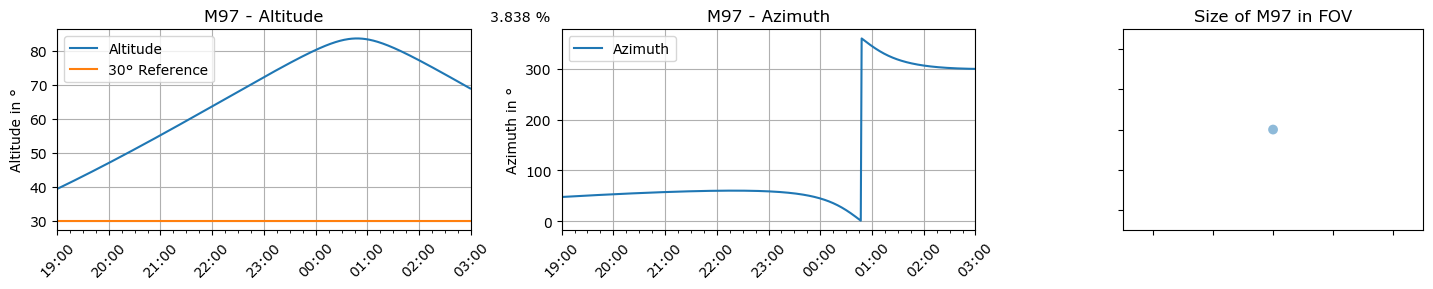

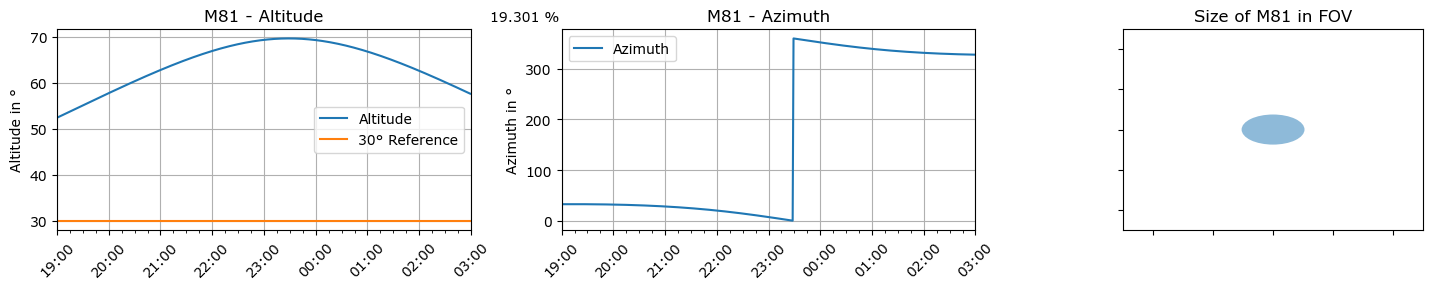

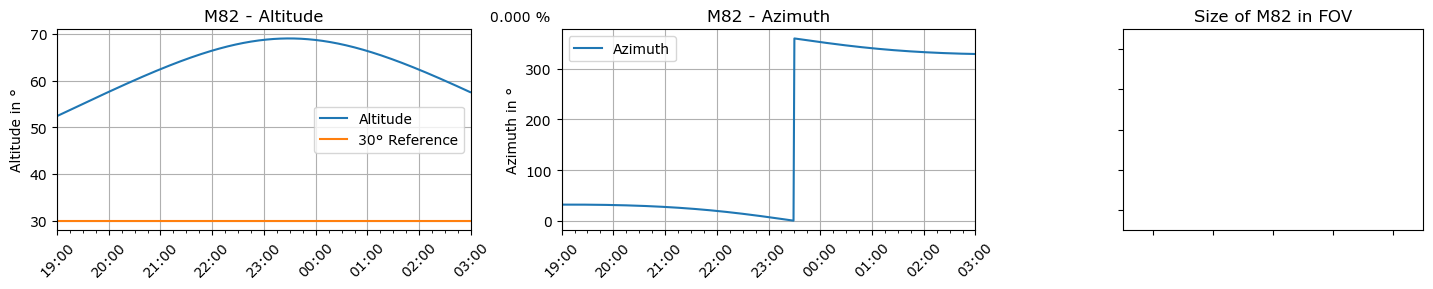

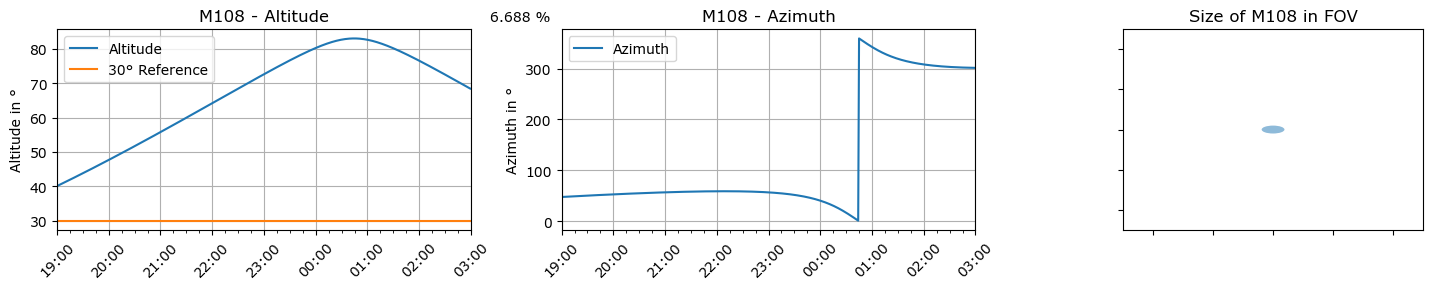

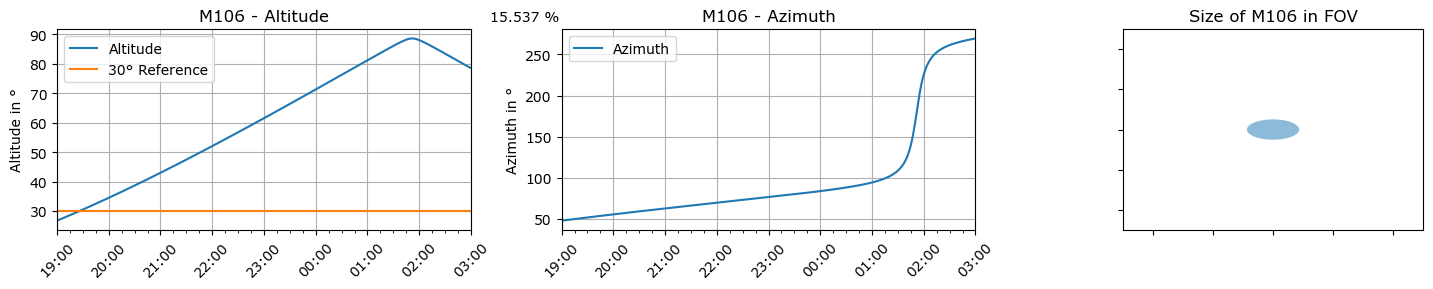

In [19]:
k = 5
k_max = len(final_best[:,0])

for n in range(k):
    H = (azimut_hoehe(Zeit_Nacht_T,final_best[n,1].astype(float),final_best[n,2].astype(float)))[1]
    a = (azimut_hoehe(Zeit_Nacht_T,final_best[n,1].astype(float),final_best[n,2].astype(float)))[0]
    A=[x + 360 if x<0 else x for x in a]
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
   # Plot Altitude (H) on the first axis
    ax1.plot(time_data, H, label='Altitude')
    ax1.plot(time_data, np.linspace(30, 30, p), label='30° Reference')
    ax1.set_title(f"{final_best[n, 0]} - Altitude")
    ax1.set_ylabel('Altitude in °')
    ax1.set_xlim(datetime.strptime("19:00", "%H:%M"), datetime.strptime("03:00", "%H:%M") + timedelta(days=1))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax1.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax1.legend()
    ax1.grid()

    
    
     # Plot Azimuth (A) on the second axis
    ax2.plot(time_data, A,"-",label='Azimuth')
    #ax2.plot(time_data, np.linspace(30, 30, len(time_data)), label='30° Reference')
    ax2.set_title(f"{final_best[n, 0]} - Azimuth")
    ax2.set_ylabel('Azimuth in °')
    ax2.set_xlim(datetime.strptime("19:00", "%H:%M"), datetime.strptime("03:00", "%H:%M") + timedelta(days=1))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax2.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax2.legend()
    ax2.grid()



    ellipse = Ellipse((0,0),width=Axes[n,1].astype(float),height=Axes[n,2].astype(float),angle = 0, alpha = 0.5)


    ax3.add_patch(ellipse)

    ax3.set_xlim(-0.5,0.5)
    ax3.set_ylim(-0.5,0.5)
    ax3.set_title(f"Size of {final_best[n,0]} in FOV")
    ax3.set_aspect(aspect=y_ax/x_ax)

    ax3.set_xticklabels([])
    ax3.set_yticklabels([])

    # Rotate x-axis labels for both plots
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    fig.text(0.33,0.91,f"{np.float64(Ratio[n,1])*100:.3f} %")
    # fig.text(0.46,0.91,f"{np.float64(surface_brightness_list[n,1]):.2f} mag/arcmin^2" )
    # Show the plots
    plt.tight_layout()
    plt.show()
    #fig.savefig(data_fin[n,0].pdf,dpi=300)

# Time Viewer

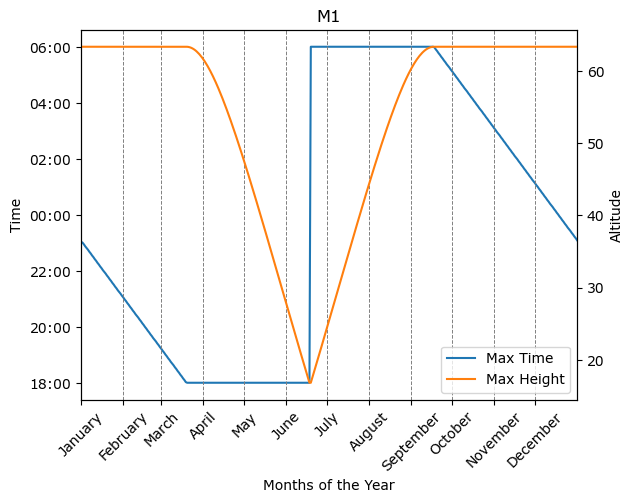

In [20]:
object_map = {name: idx for idx, name in enumerate(data_arr[:, 0])}

def get_row_by_name(name):
    """Get the row index for a given object name."""
    return object_map.get(name, None)


dt_1 = datetime(2025, 1, 1, 18, 0, 0)  
cest_tz = pytz.timezone("Europe/Berlin")  
cest_time_1 = cest_tz.localize(dt_1)

utc_time_1 = cest_time_1.astimezone(pytz.utc)
# print("utc time", utc_time_1)

# Use astropy to get Julian Date
Zeit_start = Time(utc_time_1).jd
# print(Zeit_start)

day_arr = np.linspace(0, 0.5, 1001)
max_time = []
max_height = []


object_name = "M1"  # Replace with the desired name
object_idx = get_row_by_name(object_name)

if object_idx is not None:
    for n in range(365):
        Day = Zeit_start + day_arr + n
        H_object = (azimut_hoehe(Day, data_arr[object_idx, 1].astype(float), data_arr[object_idx, 2].astype(float)))[1]
        max_time_loop = np.argmax(H_object)
        max_loop = np.max(H_object)
        max_height.append(max_loop)
        time_loop = np.linspace(0, 12, 1001)[max_time_loop]
        max_time.append(time_loop)

    max_time_arr = np.array(max_time)
    max_height_arr = np.array(max_height)
    year = np.linspace(1, 365, 365)

    def convert_time(value):
        """Converts time (0-12) to 18:00-6:00 format."""
        hours = (value + 18) % 24
        return f"{int(hours):02d}:00"

    month_days = [0] + np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]).tolist()
    month_labels = [calendar.month_name[i] for i in range(1, 13)]

    # Plotting
    fig, ax1 = plt.subplots()
    line1, = ax1.plot(year, max_time_arr, color='#1f77b4', label="Max Time")
    ax1.set_ylabel("Time")
    ax1.set_xlabel("Months of the Year")
    ax1.set_xlim(0,365)
    ax1.set_title(object_name)

    ax1.set_yticks(np.linspace(0, 12, 7))  
    ax1.set_yticklabels([convert_time(tick) for tick in np.linspace(0, 12, 7)])  

    ax1.set_xticks(month_days[:-1])  
    ax1.set_xticklabels(month_labels)

    for day in month_days[1:-1]:  # Skip the first (0) and last (end of the year)
        ax1.axvline(x=day, color='gray', linestyle='--', linewidth=0.7)

    ax2 = ax1.twinx()
    line2, = ax2.plot(year, max_height_arr, color='#ff7f0e', label="Max Height")
    ax2.set_ylabel("Altitude")


    # ax1.set_ylim(-0.5,12.5)
    # ax2.set_ylim(0,90)


    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc="lower right")  
    plt.show()
else:
    print(f"Object '{object_name}' not found in data.")


# Map

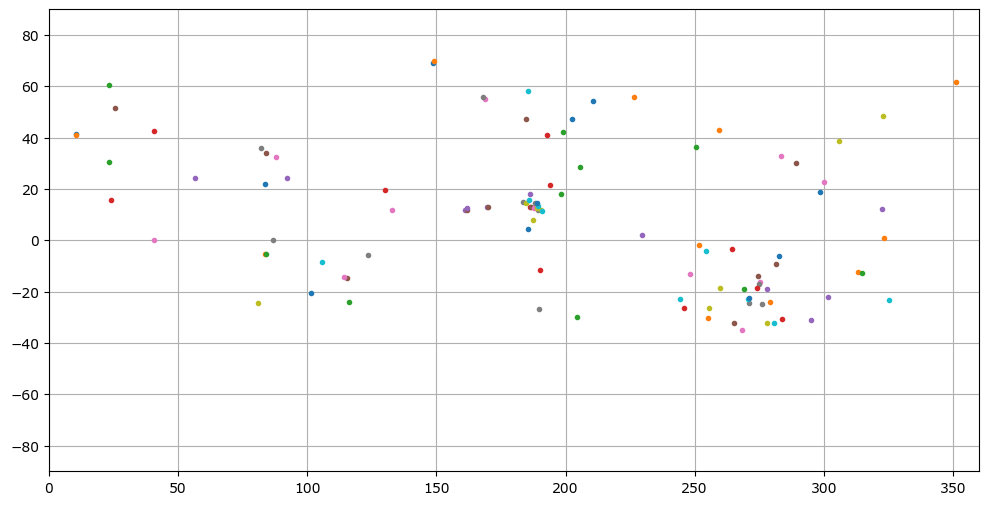

In [21]:
messier_objects = ["M" + str(i) for i in range(1, 109)]
messier_arr = Simbad_extraction(messier_objects)

l = 100

NGC_objects = ["NGC" + str(i) for i in range(1,l)]
#NGC_arr = Simbad_extraction(NGC_objects)
#print(NGC_arr)

def maping(objects):
    
    fig,ax = plt.subplots(figsize=(12,6))

    for n in range(len(objects)):

        ax.plot(objects[n,1].astype(float),objects[n,2].astype(float),".",label = objects[n,0])

    ax.set_xlim(0,360)
    ax.set_ylim(-90,90)
    ax.grid()
    plt.show

maping(messier_arr)